<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal:-Find-the-two-best-markets-to-advertise" data-toc-modified-id="Goal:-Find-the-two-best-markets-to-advertise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal: Find the two best markets to advertise</a></span></li><li><span><a href="#About-the-dataset" data-toc-modified-id="About-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>About the dataset</a></span></li><li><span><a href="#Exploring-dataset" data-toc-modified-id="Exploring-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring dataset</a></span></li><li><span><a href="#Checking-sample-representativeness" data-toc-modified-id="Checking-sample-representativeness-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking sample representativeness</a></span></li><li><span><a href="#Measuring-the-popularity-of-courses" data-toc-modified-id="Measuring-the-popularity-of-courses-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Measuring the popularity of courses</a></span><ul class="toc-item"><li><span><a href="#Interest-by-subjects---Additional-evidence" data-toc-modified-id="Interest-by-subjects---Additional-evidence-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Interest by subjects - Additional evidence</a></span></li></ul></li><li><span><a href="#Discovering-New-Coders---Locations-and-Densities" data-toc-modified-id="Discovering-New-Coders---Locations-and-Densities-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Discovering New Coders - Locations and Densities</a></span></li><li><span><a href="#Spending-money-for-learning" data-toc-modified-id="Spending-money-for-learning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Spending money for learning</a></span><ul class="toc-item"><li><span><a href="#Increasing-granularity-of-quantiles-to-check-distribution-of-values" data-toc-modified-id="Increasing-granularity-of-quantiles-to-check-distribution-of-values-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Increasing granularity of quantiles to check distribution of values</a></span></li></ul></li><li><span><a href="#Checking-for-extreme-outliers" data-toc-modified-id="Checking-for-extreme-outliers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Checking for extreme outliers</a></span><ul class="toc-item"><li><span><a href="#India-Outliers" data-toc-modified-id="India-Outliers-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>India Outliers</a></span></li><li><span><a href="#USA-Outliers" data-toc-modified-id="USA-Outliers-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>USA Outliers</a></span></li><li><span><a href="#Canada-Outlier" data-toc-modified-id="Canada-Outlier-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Canada Outlier</a></span></li></ul></li><li><span><a href="#Finding-the-Second-Best-Market-Using-Z-scores" data-toc-modified-id="Finding-the-Second-Best-Market-Using-Z-scores-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Finding the Second Best Market Using Z-scores</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Goal: Find the two best markets to advertise 

We're working for an an e-learning company that offers courses on programming. Our courses are on web and mobile development, data science and game development. We want to invest some money in advertisement.

The aim of this project is to find the two best markets to advertise our E-learning courses in.

# About the dataset

This dataset **freeCodeCamp's 2017 New Coder Survey**can be downloaded from [github](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data). The data dictionary is stored in a [json](https://github.com/erictleung/2017-new-coder-survey/blob/master/clean-data/datapackage.json) mapping column names to questions asked to help interpretation. freeCodeCamp is a non-profit organization that consists of an interactive learning web platform, an online community forum, chat rooms, Medium publications and local organizations that intend to make learning web development accessible to anyone. Its wide user base encourages good coverage of the coder population and their aspirations which will help inform our business development

Analyzing a ready made dataset initially is a much cheaper and faster option than organizing surveys for various markets. We can check if this dataset is representative of the population of interest that corresponds to our study question through some exploration. If there are missing markets not covered by the dataset, surveys could then be done. Additionally, the insights from this dataset can guide future survey design if that is necessary. 

It contains information from almost 20000 developers on their learning and job search process, their salary and other demographic and job related matters. 

# Exploring dataset 

In [224]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [99]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [100]:
print(survey.shape)
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Checking sample representativeness

In [101]:
survey.JobRoleInterest.value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                  

We analyze the JobRoleInterest column which corresponds to the question _Which one of these careers are you interested in_. There are 3000+ unique responses from permutating the multiple options that each person can choose. A quick glance shows that the top 6 frequencies are exactly what we provide. Web and Mobile developer appear frequently among the responses, in almost every reply. Game development and data science are peppered in between too. This shows that this dataset is representative of the coding population we want to advertise to.    

* The replies having multiple responses could be indicative of someone who is unfamiliar with the subjects and thus unsure of where his interests lie. Its highly likely that such a profile would be most responsive to introductory courses, and could represent a huge revenue opportunity. We can produce another frequency table to discover their prominence in the sample, with the index being number of options each respondent chose

In [102]:
print(survey.JobRoleInterest.isnull().sum()) #counting NaN, there are 11183 Nan values to clean
interests_clean = survey.JobRoleInterest.dropna()

interests = interests_clean.str.split(',')
interests.apply(lambda x: len(x)).value_counts(normalize = True)*100

11183


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

This frequency table shows that only 31% of respondents have a clear idea of where they want to go. The other 69% could likely be persuaded to sign up for multiple courses from us. 

# Measuring the popularity of courses

We specialize in web and mobile development, so establishing the popularity of these courses among the respondents is important to ascertain if we should continue investigating the demographic information from this dataset

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


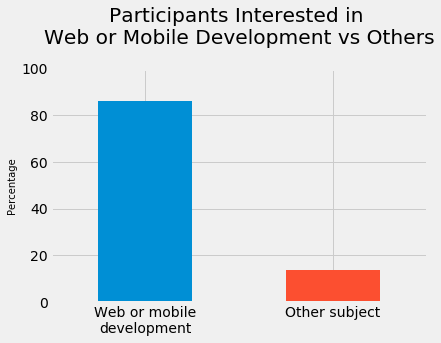

In [103]:
web_or_mobile = interests_clean.str.contains('Web Developer|Mobile Developer') 
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development vs Others',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 10)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

<a id='useful_data'></a>
We see that a good 86% of respondents are interested in what we have to offer. Now we can focus on analyzing the demographics of these to segment them create targeted effective advertising campaigns to top priority segmentations. Possible useful data are:

* age --> attention span/method of course delivery
* location --> online or offline class, place with largest # of coders
* income --> price discrimination
* highest education --> pre-requisites and course difficulty
* employment status --> urgency/demand of course, course content design (theory/practical relevance)
* learning history and habits --> course content design 
* job expectations --> course content design
* online learning platforms/forums --> channels to advertise

The other 14% still represents a sizeable portion that we can address once we have saturated our web or mobile courses.

## Interest by subjects - Additional evidence

In [104]:
from collections import defaultdict

d = defaultdict(int)
for person in interests:
    for role in person:
        d[role]+=1
        
pd.Series(d).sort_values(ascending=False)[:20]

 Full-Stack Web Developer        2490
   Front-End Web Developer       2287
 Back-End Web Developer          1997
   Mobile Developer              1734
Full-Stack Web Developer         1708
  Front-End Web Developer        1246
 Game Developer                  1162
   Data Scientist                1120
   User Experience Designer      1078
 Information Security             986
 Data Engineer                    944
Back-End Web Developer            775
   DevOps / SysAdmin              695
   Product Manager                600
  Mobile Developer                570
  Data Scientist                  523
Game Developer                    466
  User Experience Designer        391
   Quality Assurance Engineer     389
Information Security              340
dtype: int64

As an alternative form of analysis to the previous counting of participants, organizing by the number of times each interest appears, web development features strongly. This is additional evidence that web development courses have good demand.

# Discovering New Coders - Locations and Densities 

Now that we've established that the dataset is representative, we can begin looking for demographic information as described [previously](#useful_data) to identify markets. 

One such piece of information is CountryLive representing where the new coder lives. Segmenting markets by country is a possible method. We only consider participants who have indicated jobinterest

In [105]:
survey_jobinterest = survey[survey.JobRoleInterest.notnull()].copy() #prevent settingwithcopywarning when generating new col on survey_jobinterest

In [109]:
absolute_frequencies = survey_jobinterest.CountryLive.value_counts()
relative_frequencies = survey_jobinterest.CountryLive.value_counts(normalize=True)*100
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


* Based on the frequency distribution table of where new coders live, we see that the top two populous countries among respondents are USA and India representing a combined 53% of respondents. This suggests that advertisement in these two countries would reach a wide audience. 

* However, we should look at other factors such as their experience level or [other vital information](#useful_data) to determine their suitability for our courses. 

* Possible extra analysis is possible by looking at the 2016 new coder survey to check how the absolute frequency distribution table of countries have changed to track the growth in demand within each country. (Here we are assuming someone who responds to the survey is interested to take courses)

# Spending money for learning 

One important factor could be the amount of money people are willing to spend to learn. Advertising within markets where people are only willing to learn for free is extremely unlikely to be profitable.
Our subscription charges are $150/month, so we are interested in how much students have been spending per month to see if it's significantly higher or lower. `MoneyForLearning` column shows how much students have spent since programming and `MonthsProgramming` shows how long they have programmed.

Its a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada for two reasons:
* they represent collectively 60% of the respondents so there is enough data to further filter for more analysis
* English is an official language in those countries and our courses are in english, having more people knowing english increases the chances of ads reaching the right audience.

In [115]:
survey_jobinterest['moneyspent'] = survey_jobinterest.MoneyForLearning / survey_jobinterest.MonthsProgramming.replace(to_replace=0,value=1) #prevent divide 0   
survey_jobinterest['moneyspent'].isnull().sum() #516 null from numerator, 359 null from denom, 200 null overlap, so moneyspent has 675 null

675

In [163]:
survey_jobinterest_money = survey_jobinterest[survey_jobinterest.moneyspent.notnull()&survey_jobinterest.CountryLive.notnull()]
print(survey_jobinterest_money.shape) #check for sufficient data after filtering

means = survey_jobinterest_money.groupby('CountryLive').mean()['moneyspent'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
medians = survey_jobinterest_money.groupby('CountryLive').median()['moneyspent'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

modes = survey_jobinterest_money.groupby('CountryLive').agg({'moneyspent': lambda x:stats.mode(x)[0]})['moneyspent'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

pd.DataFrame(data = {'Mean': means, 'Median': medians, 'Mode': modes})

(6212, 137)


,Mean,Median,Mode
CountryLive,,,
United States of America,227.997996,3.333333,0.0
India,135.100982,0.000000,0.0
United Kingdom,45.534443,0.000000,0.0
Canada,113.510961,0.000000,0.0


The UK respondents look like they spend less than half of what the other 3 countries do. It is surprising that India is higher than UK. According to <a href = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'>GDP per capita</a>, india is ranked much lower than UK. The mode being 0 shows that in all these countries, people typically learn from free lessons. The medians are similarly insignificant compared to the means. That is unusual, implying that the top 50% are spending even more than the already high mean to create that average value.

## Increasing granularity of quantiles to check distribution of values

In [172]:
survey_jobinterest_money.groupby('CountryLive').quantile([0.6,0.7,0.8,0.9,1])['moneyspent'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]    #median is already 0, no point checking 0.1-0.5

CountryLive                  
Canada                    0.6        4.500000
                          0.7       16.666667
                          0.8       33.333333
                          0.9      212.500000
                          1.0     5000.000000
India                     0.6        2.016667
                          0.7        8.333333
                          0.8       29.711111
                          0.9      163.333333
                          1.0    10000.000000
United Kingdom            0.6        4.928571
                          0.7       12.500000
                          0.8       35.166667
                          0.9       92.727273
                          1.0     1400.000000
United States of America  0.6       12.500000
                          0.7       28.571429
                          0.8       75.000000
                          0.9      300.000000
                          1.0    80000.000000
Name: moneyspent, dtype: float64

The values increase significantly at the 90th percentile and the max value being more than 10 times the 90th percentile looks incredibly like an outlier. Such values could also be because our data is not representative of the spending patterns, since we only checked representativeness according to `JobRoleInterest`.

# Checking for extreme outliers 

C:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'United States of America'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'India'),
 Text(0,0,'Canada')]

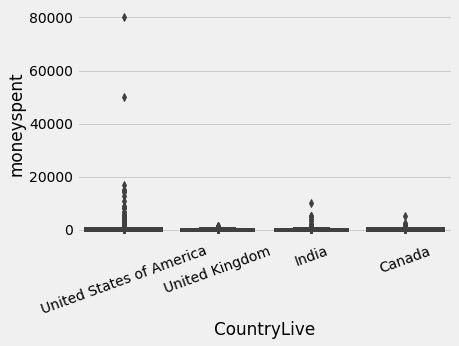

In [209]:
import seaborn as sns

four_countries =  survey_jobinterest_money[survey_jobinterest_money.CountryLive.str.contains(
    'United States of America|India|United Kingdom|Canada')]

ax =sns.boxplot(y = 'moneyspent', x = 'CountryLive',
            data = four_countries)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

The boxplot shows that there are two extreme outliers in USA, representing someone spending $50000 and $80000 a month for learning. This is highly improable, so we will remove rows with moneyspent above $20000.

In [211]:
survey_jobinterest_money = survey_jobinterest_money[survey_jobinterest_money.moneyspent <20000]
survey_jobinterest_money.groupby('CountryLive').mean()['moneyspent'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneyspent, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'United States of America'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'India'),
 Text(0,0,'Canada')]

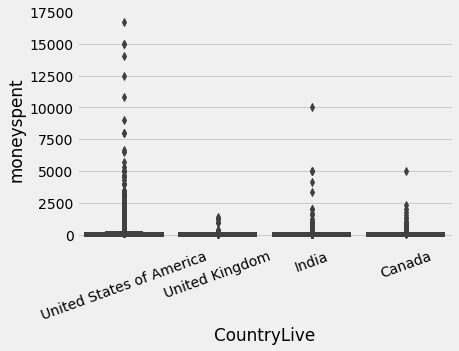

In [268]:
four_countries =  survey_jobinterest_money[survey_jobinterest_money.CountryLive.str.contains(
    'United States of America|India|United Kingdom|Canada')]

ax =sns.boxplot(y = 'moneyspent', x = 'CountryLive',
            data = four_countries)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

## India Outliers 

There are 4 people in India with more than 2500 spending, let's check if they attended any bootcamps which are usually costly.

In [269]:
india_outliers = four_countries[(four_countries.CountryLive == 'India')&(four_countries.moneyspent > 2500)][['AttendedBootcamp','BootcampFinish','MonthsProgramming','moneyspent']].sort_values('moneyspent')
india_outliers

,AttendedBootcamp,BootcampFinish,MonthsProgramming,moneyspent
1755,0.0,NaN,15.0,3333.333333
15587,0.0,NaN,24.0,4166.666667
1728,0.0,NaN,4.0,5000.000000
7989,0.0,NaN,1.0,5000.000000
8126,0.0,NaN,1.0,5000.000000
13398,0.0,NaN,2.0,10000.000000


None of them have attended bootcamps, so it's hard to explain the high spending. However, it is safe to remove them as we are only removing a small number of samples and our companies pricing should not be straying too far from the mean amount they are already paying.

In [270]:
four_countries = four_countries.drop(india_outliers.index)

C:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'United States of America'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'India'),
 Text(0,0,'Canada')]

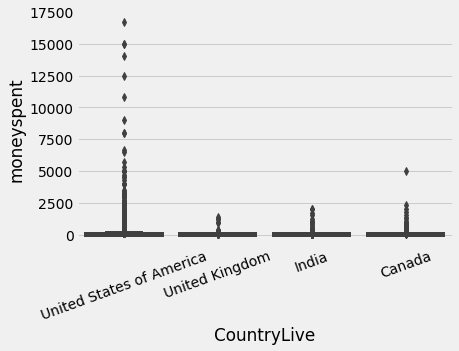

In [271]:
ax =sns.boxplot(y = 'moneyspent', x = 'CountryLive',
            data = four_countries)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

## USA Outliers

In [241]:
four_countries[(four_countries.CountryLive == 'United States of America')&(four_countries.moneyspent > 7500)][['AttendedBootcamp','BootcampFinish','MonthsProgramming','moneyspent']].sort_values('moneyspent')

,AttendedBootcamp,BootcampFinish,MonthsProgramming,moneyspent
718,1.0,0.0,1.0,8000.000000
9778,1.0,0.0,1.0,8000.000000
3184,1.0,1.0,0.0,9000.000000
3930,0.0,NaN,6.0,10833.333333
16997,0.0,NaN,1.0,12500.000000
7198,0.0,NaN,5.0,14000.000000
6805,1.0,1.0,1.0,15000.000000
17231,0.0,NaN,2.0,15000.000000
16650,0.0,NaN,12.0,16666.666667


We will drop everyone that did not attend a bootcamp for similar reasons as when filtering india outliers. 6805 should be dropped too as bootcamps are unlikely to cost 15000 in one month. So that is conveniently equal to everyone above \$9000 `moneyspent`. However the two who spent $8000 are only 1 month into their bootcamp and probably will not be paying new fees for the next few months so they should be removed too.

In [272]:
four_countries = four_countries[(four_countries.moneyspent <= 9000)&(four_countries.moneyspent != 8000)]

C:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'United States of America'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'India'),
 Text(0,0,'Canada')]

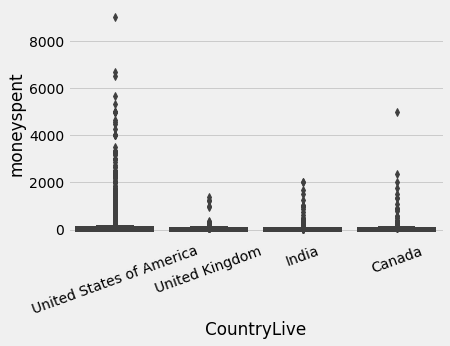

In [274]:
ax =sns.boxplot(y = 'moneyspent', x = 'CountryLive',
            data = four_countries)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

## Canada Outlier 

In [275]:
four_countries[(four_countries.CountryLive == 'Canada') & (four_countries.moneyspent > 4000)] 

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,moneyspent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This person is an outlier like explained in USA outliers. He has only been programming 2 months and bootcamps are expected to last 3-6 months, so we probably will not be paying the next few months.

In [276]:
four_countries = four_countries.drop(13659)

C:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0,0,'United States of America'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'India'),
 Text(0,0,'Canada')]

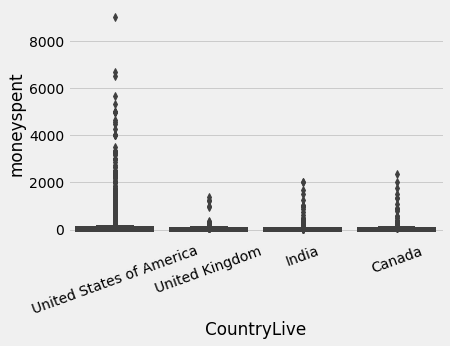

In [277]:
ax =sns.boxplot(y = 'moneyspent', x = 'CountryLive',
            data = four_countries)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

In [313]:
four_countries.groupby('CountryLive').mean()['moneyspent']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    150.091728
Name: moneyspent, dtype: float64

[Text(0,0,'$0'),
 Text(0,0,'$20'),
 Text(0,0,'$40'),
 Text(0,0,'$60'),
 Text(0,0,'$80'),
 Text(0,0,'$100'),
 Text(0,0,'$120'),
 Text(0,0,'$140'),
 Text(0,0,'$160')]

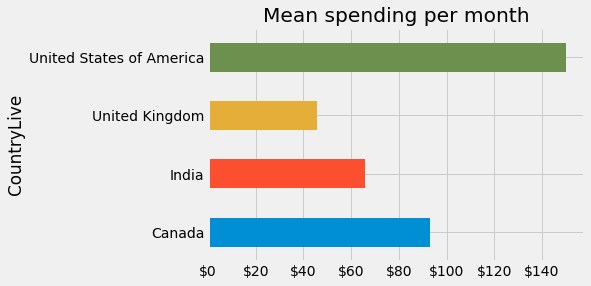

In [311]:
ax = four_countries.groupby('CountryLive').mean()['moneyspent'].plot.barh(title='Mean spending per month')
ax.set_xticklabels([f'${x}' for x in range(0,180,20)])   #scaling issues?

After removing outliers for all countries besides UK, we see that an obvious advertising target is USA with an average of $150 per month spent. The second advertising target could be Canada. However these results are only the mean spending. We can make better decisions by considering the variance of the distribution of spendings too (assuming spending patterns are normal)

# Finding the Second Best Market Using Z-scores 

In [405]:
z_scores = (150 - four_countries.groupby('CountryLive').mean()['moneyspent'])/four_countries.groupby('CountryLive').std()['moneyspent']
z_scores

CountryLive
Canada                      0.185145
India                       0.360849
United Kingdom              0.643610
United States of America   -0.000165
Name: moneyspent, dtype: float64

We can see that Canada has the smallest z-score among the other 3 countries, which means that $150 is not as many standard deviations away from the norm (mean) as compared to the other countries, thus it is a good 2nd choice of market.

In [417]:
four_countries['CountryLive'].value_counts()

United States of America    2923
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

However India has double the number of respondents in Canada, so maybe india is a good choice too. Possibly, we can split the advertising budget between USA, Canada, and India. We can send this analysis to the marketing team and they may decide to do surveys in India and Canada and come back with more results for us to analyze. 

# Conclusion 

The only solid choice was USA, but we should keep in mind possible selection bias for the case where USA residents were most accessible to/aware of this survey, since we only checked representativeness according to `JobRoleInterest`.

For the choice of second best market, the domain knowledge of and further action/data from the marketing team could resolve the tie. 